In [1]:
from UTILITY_quickstart import *

with open('setLattice_defaults.yml', 'r') as file:
    importedDefaultSettings = yaml.safe_load(file)

In [2]:
csrTF = False
evalElement = "PENT"

inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
tao = initializeTao(
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e4,
)


Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_defaults.yml
Number of macro particles = 10000.0


Loaded activeBeamFile.h5
Set track_start = L0AFEND, track_end = end
Set track_end = BEGBC14_1
Tracking!
Beam centered at BEGBC14 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC14_1, track_end = end
Set track_end = BEGBC20
Tracking!
Beam centered at BEGBC20 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC20, track_end = end
Tracking!
trackBeam() exiting
Loaded activeBeamFile.h5
Set track_start = L0AFEND, track_end = end
Set track_end = BEGBC14_1
Tracking!
Beam centered at BEGBC14 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC14_1, track_end = end
Set track_end = BEGBC20
Tracking!
Beam centered at BEGBC20 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC20, track_end = end
Set track_end = CN2069
Tracking!
[-0.002, -0.0015]
New particle count: 5472
5472
[-0.0011, -0.001]
New particle count: 4795
4795
Collimated beam written to patchBeamFile.h5. Rules: [[-0.002, -0.0015], [-0.0011,

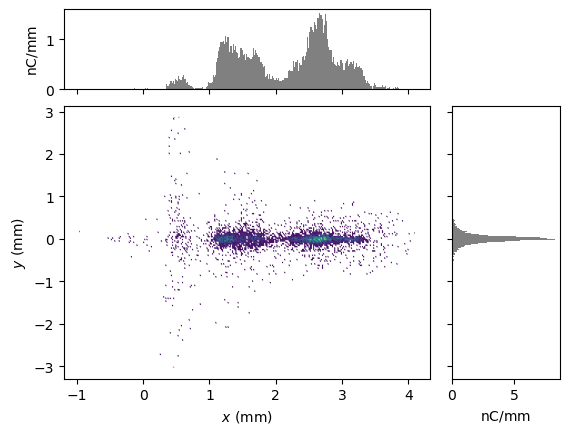

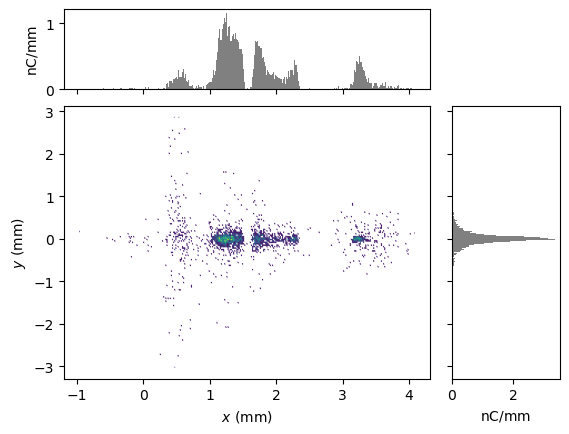

<Figure size 640x480 with 0 Axes>

In [3]:
comparisonElement = "CB2LE"

trackBeam(tao, verbose = True, centerBC14=True, centerBC20=True)

P_baseline_comparison = getBeamAtElement(tao, comparisonElement)

trackBeam(tao, verbose = True, centerBC14=True, centerBC20=True, allCollimatorRules = [[-0.002, -0.0015], [-0.0011, -0.001]] )

P_mod_comparison = getBeamAtElement(tao, comparisonElement)

display(plotMod(P_baseline_comparison, 'x', 'y',  bins=300))
display(plotMod(P_mod_comparison, 'x', 'y',  bins=300))
plt.clf()

# Notch scan

-0.003
[-0.0035, -0.0025]
New particle count: 10000
10000


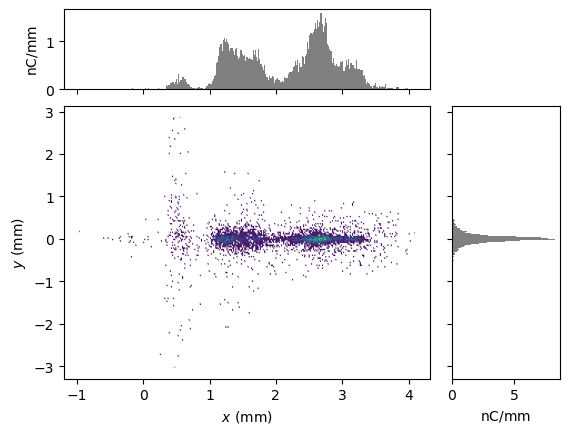

-0.0025
[-0.003, -0.002]
New particle count: 9334
9334


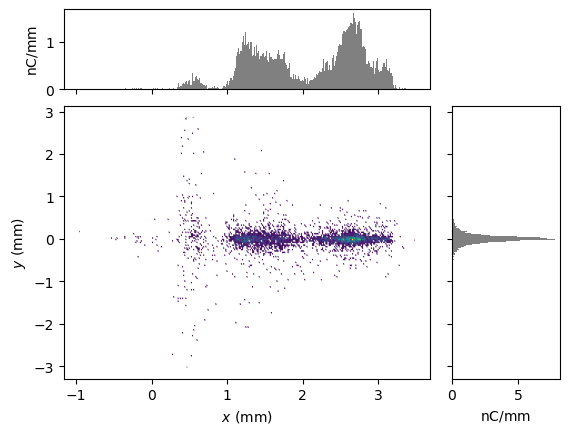

-0.002
[-0.0025, -0.0015]
New particle count: 4796
4796


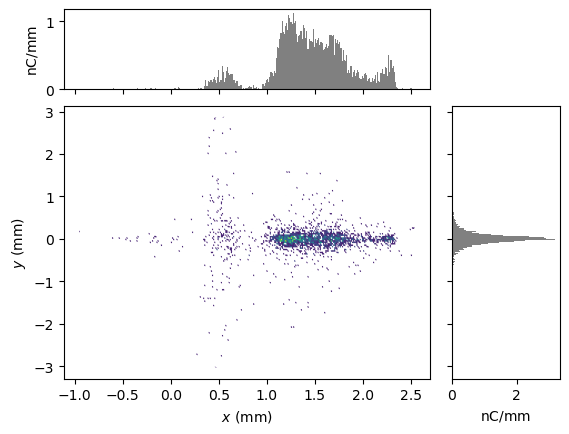

-0.0015
[-0.002, -0.001]
New particle count: 3336
3336


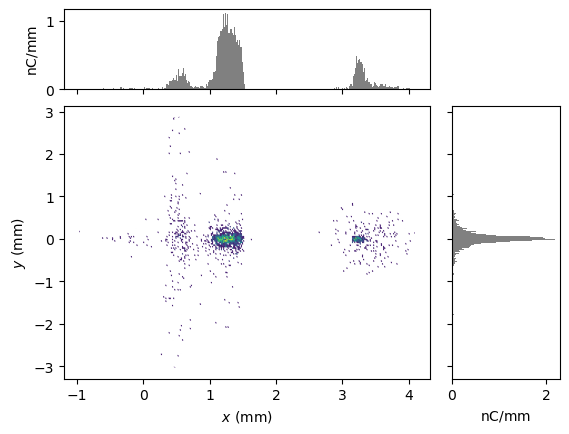

-0.001
[-0.0015, -0.0005]
New particle count: 5579
5579


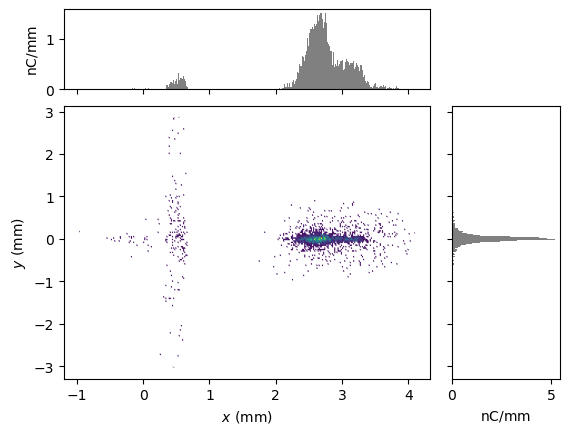

-0.0005


In [ ]:
# trackBeam(tao, verbose = True, centerBC14=True, centerBC20=True)
# startTracking = "BEGBC20"

# P_startTracking = getBeamAtElement(tao, startTracking)

# makeBeamActiveBeamFile(P_startTracking)
# tao.cmd('reinit beam')




notchWidth = 0.001

for notchPosition in np.arange(-0.003, 0.003, 0.0005):
    print(notchPosition)

    # makeBeamActiveBeamFile(P_startTracking)
    # tao.cmd('reinit beam')
    #trackBeam(tao, verbose = True, startTracking = startTracking, allCollimatorRules = [[notchPosition - notchWidth, notchPosition + notchWidth]])

    trackBeam(tao, centerBC14=True, centerBC20=True, allCollimatorRules = [[notchPosition - notchWidth/2, notchPosition + notchWidth/2]])
    
    P_comparison = getBeamAtElement(tao, comparisonElement)
    
    display(plotMod(P_comparison, 'x', 'y',  bins=300))

plt.clf()